# Multiple Linear Regression 

----> Refer to advertising.csv file

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("advertising.csv")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

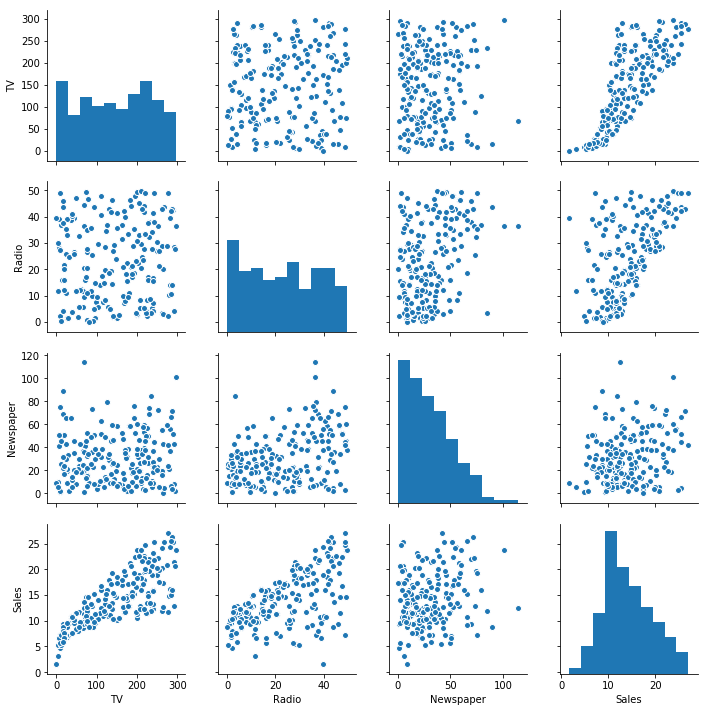

In [7]:
sns.pairplot(df) #this pairplot compares all the attributes in a square matrix way

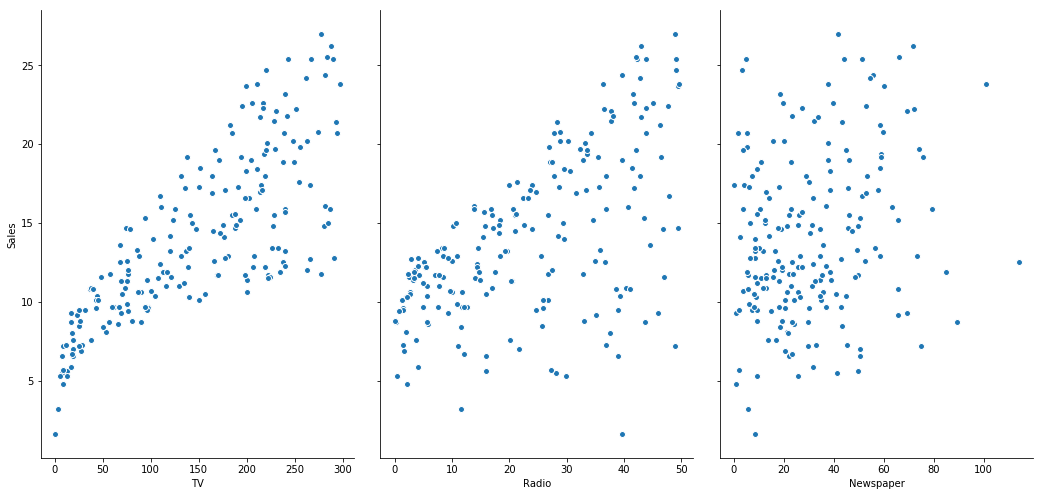

In [9]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=7,aspect=0.7,kind ='scatter')

# Splitting Data

In [10]:
X=df[['TV','Radio','Newspaper']]
Y=df['Sales']

In [11]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [12]:
Y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

# Dividing Data into Training and Testing Sets

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state=100)

# Performing Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm=LinearRegression() # creating a blank object of linear regression

In [16]:
lm.fit(x_train,y_train) #fitting the data into model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Model Evaluation

In [17]:
print(lm.intercept_)
print()
print("Coefficient For---->")
print()
print("TV          Radio       Newspaper")
print(lm.coef_)

2.6527896688794943

Coefficient For---->

TV          Radio       Newspaper
[0.0454256  0.18975773 0.00460308]


In [18]:
df_coeff=pd.DataFrame(lm.coef_,x_test.columns,columns=["Coefficient"])
df_coeff

,Coefficient
TV,0.045426
Radio,0.189758
Newspaper,0.004603


Coefficient concludes that if we increase our sale (e.g. for TV) by 1 unit it will affect sales by 0.045 %

# Prediction goes under

In [19]:
y_pred=lm.predict(x_test) #predicting the test value against our model

In [20]:
y_pred

array([10.62160072, 20.00625302, 16.91850882, 19.17040746, 20.94974131,
       13.12284284, 11.80740696, 12.32019766, 20.57806782, 20.95662688,
       10.79096475, 19.54868702,  6.42403866, 15.23133391,  8.97226257,
        7.89897862, 16.23599497, 12.02636477, 17.09702178, 11.26080277,
       16.97826292,  9.75655721, 20.82389762, 17.20916742, 15.13816239,
       21.97290698, 19.20181841, 10.07501899, 19.39017185, 14.8673761 ,
       14.36798893,  7.55604543,  9.96742165, 14.76342565,  7.20995576,
       13.60003295,  7.49088656, 11.70865932, 13.46091883, 15.2229793 ,
       17.18088277, 13.56738329, 14.30942267, 13.72909849, 11.88559349,
        8.77039705, 12.1244102 , 19.20252289,  9.08376601,  5.15367352,
       16.22852749, 18.14111213, 12.94835466, 16.86274503, 17.86462435,
       12.33930625,  4.3575739 , 11.25904494, 16.11560622, 13.56602169])

In [21]:
y_pred.shape

(60,)

In [22]:
"""Representing equation
General equation of line---> y= m1 * x1 + m2 * x2 + m3 * x3 + c

According to our data the equation becomes----> sales = coefficient * tv + coefficient * Radio + coefficient * Newspaper + intercept

i.e.

slaes = 0.0464 * tv + 6.9896"""

'Representing equation\nGeneral equation of line---> y= m1 * x1 + m2 * x2 + m3 * x3 + c\n\nAccording to our data the equation becomes----> sales = coefficient * tv + coefficient * Radio + coefficient * Newspaper + intercept\n\ni.e.\n\nslaes = 0.0464 * tv + 6.9896'

# Calculating mean square and R sqaure values

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
mse= mean_squared_error(y_test,y_pred)
r_squared= r2_score(y_test,y_pred)

In [24]:
print("mean squared error----> " , mse)
print()
print("R squared value----> ", r_squared)

mean squared error---->  1.8506819941636972

R squared value---->  0.9058622107532245


From the above data we can conclude that the Mean sqr error is very less and the R Squared value is very high that means the model is pretty good....

# Optional Step (but also usefull) : Calculating P value using STATSMODELS

Although this is an optional step but this is also very important step to determine wheather we need to keep certain attribute(column) in our model or not this means that if any model is not much significantly affecting our prediction rather it can harm our model we can reject(drop) that attribute to improve our model...

---> P value is nothing but the null hypothesis value, with respect to which we are going to judge any attribute(no offence :-p) so using this value if our model is gernerating p value greater that 0.05 we can drop that attribute and proceed further...

In [25]:
import statsmodels.api as sm
x_train_sm=x_train

#for coefficient we need to fit it manually because unlike sklearn it do not automatically fit a constant
x_train_sm=sm.add_constant(x_train_sm)

#create fitted model in one line
lm_1=sm.OLS(y_train,x_train_sm).fit()

#printing coefficients
lm_1.params

const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [26]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           9.97e-66
Time:                        09:52:35   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

-----> The above summary is very important as we can see already that the p value for Newspaper is very high (much more than 0.05) so we can reject the corresponding attribute. Newspaper Attribute is insignificant..

# Removing the Newspaper column and creating our model again 

In [27]:
#removing newspaper from our dataset
x_train_new=x_train[['TV','Radio']]
x_test_new=x_test[['TV','Radio']]

In [28]:
lm.fit(x_train_new,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
y_pred_new=lm.predict(x_test_new)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
mse_new= mean_squared_error(y_test,y_pred_new)
r_squared_new= r2_score(y_test,y_pred_new)

In [31]:
print("New Mean square error--->", mse)
print("New R squared value--->", r_squared_new)

New Mean square error---> 1.8506819941636972
New R squared value---> 0.909216449171822


From above evaluation we can observe that R squared value is increased from previos model...

# Comparing Actual VS Predicted

Text(0,0.5,'Sales')

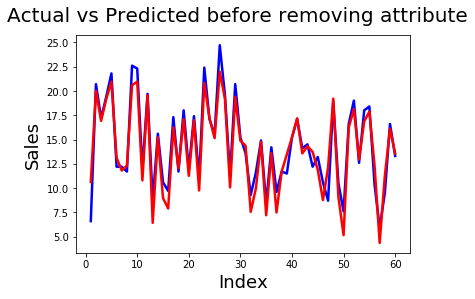

In [32]:
c= [i for i in range(1,61,1)] # generating indexes
fig =plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred, color="red", linewidth=2.5, linestyle="-")
fig.suptitle("Actual vs Predicted before removing attribute", fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Sales',fontsize=18)

Text(0,0.5,'Sales')

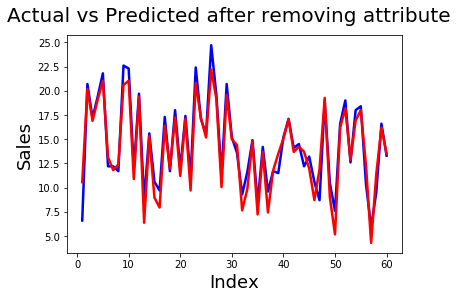

In [33]:
c= [i for i in range(1,61,1)] # generating indexes
fig =plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred_new, color="red", linewidth=2.5, linestyle="-")
fig.suptitle("Actual vs Predicted after removing attribute", fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Sales',fontsize=18)

# Plotting error

Text(0,0.5,'Sales')

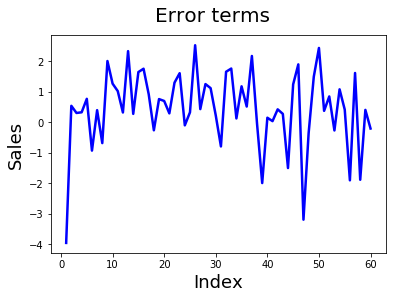

In [36]:
c=[i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c, y_test-y_pred_new , color="blue", linewidth=2.5, linestyle="-")
fig.suptitle("Error terms", fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Sales',fontsize=18)

------>> We can observe errors on y-axis, in the above gaph the values below 0 are error values e.g. the verry first value i.e. -4 is an error value....

# Generating summary again for checking P value

In [38]:
x_train_sm=x_train_new
x_train_sm=sm.add_constant(x_train_sm)

lm_1=sm.OLS(y_train,x_train_sm).fit()

#printing coefficients
lm_1.params

const    2.719040
TV       0.045533
Radio    0.192488
dtype: float64

In [40]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           4.46e-67
Time:                        10:09:51   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.0

# What if we take only  Newspaper and use it for creating Simple Regression Model:: Newspaper(x)  Sales(y)

In [43]:
import pandas as pd
import numpy as np
# Importing dataset
advertising_multi = pd.read_csv('advertising.csv')

x_news = advertising_multi['Newspaper']

y_news = advertising_multi['Sales']

# Data Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_news, y_news, 
                                                    train_size=0.7 ,test_size=0.3, 
                                                    random_state=110)

# Required only in the case of simple linear regression
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

# Linear regression from sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Fitting the model
lm.fit(X_train,y_train)

# Making predictions
y_pred = lm.predict(X_test)

# Importing mean square error and r square from sklearn library.
from sklearn.metrics import mean_squared_error, r2_score

# Computing mean square error and R square value
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Printing mean square error and R square value
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 23.84732008485191
r_square_value : 0.08182413570736657


From above result we can observe that the error value is quite high and the R squared value is very low, thus rejecting the particular column will definately make our model a good one.

# X--------X------ Case Study Ends Here------X---------X